<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Lesson:</span> Feature Engineering</h1>

<hr>

After cleaning the dataset, the next step is to engineer features that can help our predictive models. 

<br>

**<span style="color:tomato;font-weight:bold">Feature engineering</span> is the practice of creating new features from existing ones.**

**The engineered features are often more specific or isolate key information.**

<br>
Often, feature engineering is one of the most valuable tasks a data scientist can do to improve model effectiveness.

This is not an exhaustive list of all types of feature engineering. There are limitless possibilities for this step, and it's a skill that will naturally improve as you gain more experience and domain expertise. However, you can use this checklist as a reliable starting point!



<br><hr id="toc">

### In this lesson...

We'll load our cleaned dataset and then cover these steps: 

1. [Start with domain knowledge](#domain)
2. [Create interaction features](#interaction)
3. [Group sparse classes](#group)
4. [Encode dummy variables](#dummy)
5. [Remove unused or redundant features](#remove)

Finally, we'll save the augmented dataframe (analytical base table) to a new file so we can use it for modeling.

<br><hr>

### First, let's import libraries and load the cleaned dataset.

In general, it's good practice to keep all of your library imports at the top of your notebook or program.

Let's import the libraries we'll need for this module.

In [64]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt

# Seaborn for easier visualization
import seaborn as sns; sns.set()

<br>

Next, let's import the **cleaned** dataset that we created in the previous module.

In [65]:
# Load cleaned dataset from Lesson 2
df = pd.read_csv('../project_files/clean_real_estate_data.csv')

Now, let's display the first 5 rows from the dataset, just so we can have all of the existing features in front of us.

In [66]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [67]:
df.shape


(1883, 26)

In [68]:
df.columns

Index(['tx_price', 'beds', 'baths', 'sqft', 'year_built', 'lot_size',
       'property_type', 'exterior_walls', 'roof', 'basement', 'restaurants',
       'groceries', 'nightlife', 'cafes', 'shopping', 'arts_entertainment',
       'beauty_spas', 'active_life', 'median_age', 'married', 'college_grad',
       'property_tax', 'insurance', 'median_school', 'num_schools', 'tx_year'],
      dtype='object')

<br>

<br id="domain">

# 1. Start with domain knowledge

You can often engineer informative features by tapping into your (or others') expertise about the domain.

<br>
Create an indicator variable to flag properties with 2 beds and 2 baths and name it <code style="color:steelblue">'two_and_two'</code>.

In [69]:
(df['beds'] == 2).mean()

0.1412639405204461

In [70]:
(df['beds'] == 2).sum() / (df['beds'] == 2).count()

0.1412639405204461

In [71]:
((df['beds'] == 2) & (df['baths'] == 2))

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1853    False
1854    False
1855    False
1856    False
1857    False
1858    False
1859    False
1860    False
1861    False
1862    False
1863    False
1864    False
1865    False
1866    False
1867    False
1868    False
1869    False
1870    False
1871    False
1872    False
1873    False
1874    False
1875    False
1876    False
1877    False
1878    False
1879    False
1880    False
1881    False
1882    False
Length: 1883, dtype: bool

In [72]:
# Create indicator variable for properties with 2 beds and 2 baths
df["two_and_two"] = ((df['beds'] == 2) & (df['baths'] == 2)).astype(int)

Display the proportion of our observations that have 2 beds and 2 baths.

In [73]:
# Display percent of rows where two_and_two == 1
df["two_and_two"].mean()

0.09453000531067446

Next, let's engineer an indicator feature for the housing market recession.


<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 3.1</span>

**Create a new feature called <code style="color:steelblue">'during_recession'</code> to indicate if a transaction falls between 2010 and 2013.**
1. Create a boolean mask to check if <code style="color:steelblue">tx_year >= 2009</code>
2. Create a boolean mask to check if <code style="color:steelblue">tx_year <= 2013</code>
3. Combine the two masks with an <code style="color:steelblue">&</code> operator
4. Convert the resulting series to type <code style="color:steelblue">int</code> to map from <code style="color:crimson">True/False</code> to <code style="color:crimson">1/0</code>

In [74]:
df['during_recession'] = ((df['tx_year'] >= 2009) & (df['tx_year'] <= 2013)).astype(int)

**What proportion of transactions in our dataset were during the recession?**

In [75]:
# Print percent of transactions where during_recession == 1
df['during_recession'].mean()

0.32554434413170474

In the case where we're checking to see if a value falls between two numbers, there's a shortcut:

```python 
df['tx_year'].between(2010, 2013).astype(int)
```

This creates an indicator feature that should be equivalent to the one you created earlier from combining two boolean masks.

<br>

**Confirm that the "between" indicator feature is equivalent to the one you created earlier.**
* Set the earlier feature to a variable named <code style="color:steelblue">a</code>
* Set this new feature to a variable named <code style="color:steelblue">b</code>
* Confirm they are equivalent with <code style="color:steelblue">all(a == b)</code>, which checks to see if every element in <code style="color:steelblue">a</code> is equal to the corresponding element in <code style="color:steelblue">b</code>

In [76]:
# Set variable a as the earlier indicator variable (combining two masks)
a = ((df['tx_year'] >= 2009) & (df['tx_year'] <= 2013)).astype(int)

# Set variable b as the new indicator variable (using "between")
b = df['tx_year'].between(2009, 2013).astype(int)

# Are a and b equivalent?
all(a == b)

True

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<div style="text-align:center; margin: 40px 0 40px 0;">
    
[**Back to Contents**](#toc)
</div>

<br>

<br id="interaction">

# 2. Create interaction features

Next, we have a few specific **heuristics** that can help spark more ideas.

<br>
Create <code style="color:steelblue">'property_age'</code> feature for the age of the property at the time of the transaction.

In [77]:
# Create a property age feature
# A goog feature
df['property_age'] = df['tx_year'] - df['year_built']

Do a quick sanity check. Print the minimum <code style="color:steelblue">'property_age'</code>.

In [78]:
# Should not be less than 0
print(df.property_age.min())

-8


Print the number of observations with <code style="color:steelblue">'property_age'</code> less than 0.

In [79]:
df = df[df['property_age'] >= 0]

In [80]:
# Number of observations with 'property_age' < 0
(df['property_age'] >= 0).sum()


1864

In [81]:
df.count()

tx_price              1864
beds                  1864
baths                 1864
sqft                  1864
year_built            1864
lot_size              1864
property_type         1864
exterior_walls        1642
roof                  1511
basement              1864
restaurants           1864
groceries             1864
nightlife             1864
cafes                 1864
shopping              1864
arts_entertainment    1864
beauty_spas           1864
active_life           1864
median_age            1864
married               1864
college_grad          1864
property_tax          1864
insurance             1864
median_school         1864
num_schools           1864
tx_year               1864
two_and_two           1864
during_recession      1864
property_age          1864
dtype: int64

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">

## <span style="color:RoyalBlue">Exercise 3.2<span>

**Remove observations where <code style="color:steelblue">'property_age'</code> is less than 0.**
* **Tip:** You can use a boolean mask to keep only observations where <code style="color:steelblue">'property_age'</code> is at least 0.
* Overwrite the existing <code style="color:steelblue">df</code>.
* Print the length of the new DataFrame.

In [82]:
# Remove rows where property_age is less than 0
df = df[df['property_age'] >= 0]

In [83]:
# Print number of rows in remaining dataframe
print(df.shape)

(1864, 29)


In [84]:
df = df.reset_index(drop=True)

<br>

Now, let's add another interaction feature. How about the number of quality schools nearby?

* Well, we do know the number of schools nearby (<code style="color:steelblue">'num_schools'</code>) 
* We also have their median quality score (<code style="color:steelblue">'median_schools'</code>)
* But what if it's the **interaction** of those two factors that's really important? 
* In other words, what if it's good to have many school options, but only if they are good?

We can represent this with an interaction feature.

<br>

**Create a new feature called <code style="color:steelblue">'school_score'</code> that is the product of <code style="color:steelblue">'num_schools'</code> and <code style="color:steelblue">'median_schools'</code>.**

In [85]:
# Create a school score feature that num_schools * median_school
df['school_score'] = df['num_schools'] * df['median_school']

**Finally, display the median <code style="color:steelblue">'school_score'</code> from the dataset.**

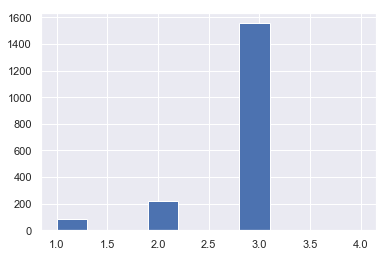

In [86]:
df['num_schools'].hist()
plt.show()

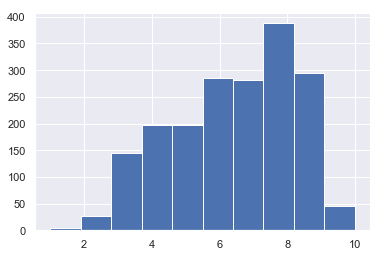

In [87]:
df['median_school'].hist()
plt.show()

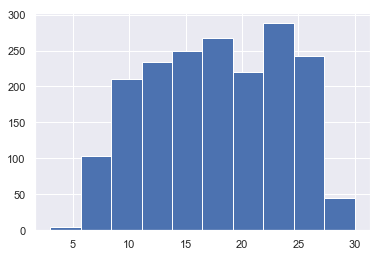

In [88]:
# Display median school score
df['school_score'].hist()
plt.show()

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<div style="text-align:center; margin: 40px 0 40px 0;">
    
[**Back to Contents**](#toc)
</div>

<br>

<br id="group">

# 3. Group sparse classes

The next heuristic we'll consider is grouping sparse classes in our categorical features. 

<br>
Let's begin by plotting the bar plots for <code style="color:steelblue">'exterior_walls'</code> again.

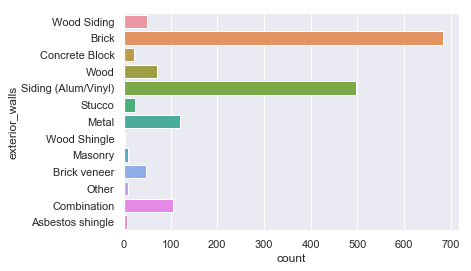

In [89]:
# Bar plot for exterior_walls
sns.countplot(y='exterior_walls', data=df)
plt.show()

Group <code style="color:crimson">'Wood Siding'</code>, <code style="color:crimson">'Wood Shingle'</code>, and <code style="color:crimson">'Wood'</code> together. Label all of them as <code style="color:crimson">'Wood'</code>.

In [90]:
# Group 'Wood Siding' and 'Wood Shingle' with 'Wood'
df['exterior_walls'] = df['exterior_walls'].replace(['Wood Siding', 'Wood Shingle'], 'Wood')
df['exterior_walls'].replace(['Wood Siding', 'Wood Shingle'], 'Wood').value_counts()

Brick                  683
Siding (Alum/Vinyl)    496
Wood                   122
Metal                  120
Combination            106
Brick veneer            48
Stucco                  23
Concrete Block          22
Masonry                  8
Other                    8
Asbestos shingle         6
Name: exterior_walls, dtype: int64

Next, let's label <code style="color:crimson">'Stucco'</code>, <code style="color:crimson">'Other'</code>, <code style="color:crimson">'Asbestos shingle'</code>, <code style="color:crimson">'Concrete Block'</code>, and <code style="color:crimson">'Masonry'</code> as <code style="color:crimson;">'Other'</code>:

In [91]:
# List of classes to group
other_ew = ['Stucco', 'Asbestos shingle', 'Concrete Block', 'Masonry']

# Group other classes into 'Other'
df['exterior_walls'] = df['exterior_walls'].replace(other_ew, 'Other')
df['exterior_walls'].replace(other_ew, 'Other').value_counts()

Brick                  683
Siding (Alum/Vinyl)    496
Wood                   122
Metal                  120
Combination            106
Other                   67
Brick veneer            48
Name: exterior_walls, dtype: int64

Finally, now that we've grouped together sparse classes, let's look at the bar plot for exterior walls again.

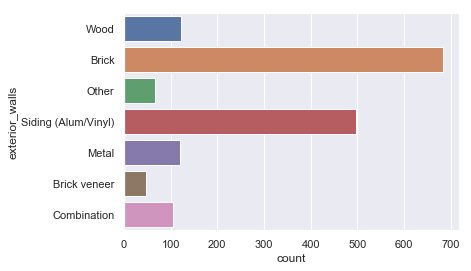

In [92]:
# Bar plot for exterior_walls
sns.countplot(y='exterior_walls', data=df)
plt.show()

<br>

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 3.3</span>

**First, display the bar plot for <code style="color:steelblue">'roof'</code>.**

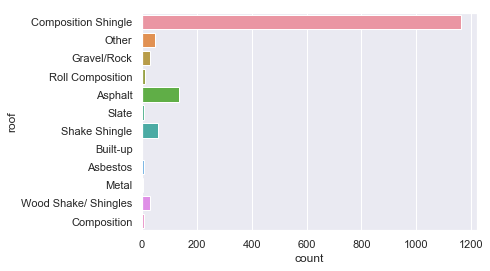

In [93]:
# Bar plot for roof
sns.countplot(y='roof', data=df)
plt.show()

As with the <code style="color:steelblue">'exterior_walls'</code> feature above, we can start by grouping classes that are quite similar. 

<br>

**Group <code style="color:crimson">'Composition'</code> and <code style="color:crimson">'Wood Shake/ Shingles'</code> into the <code style="color:crimson">'Composition Shingle'</code> class.**

In [94]:
# Group 'Composition' and 'Wood Shake/ Shingles' into 'Composition Shingle'
df['roof'] = df['roof'].replace(['Composition', 'Wood Shake/ Shingles'], 'Composition Shingle')
df['roof'].replace(['Composition', 'Wood Shake/ Shingles'], 'Composition Shingle').value_counts()

Composition Shingle    1201
Asphalt                 136
Shake Shingle            59
Other                    49
Gravel/Rock              30
Roll Composition         12
Asbestos                  9
Slate                     9
Metal                     4
Built-up                  2
Name: roof, dtype: int64

Next, let's group remaining sparse classes into a single <code style="color:crimson">'Other'</code> class.

<br>

**Label <code style="color:crimson">'Other'</code>, <code style="color:crimson">'Gravel/Rock'</code>, <code style="color:crimson">'Roll Composition'</code>, <code style="color:crimson">'Slate'</code>, <code style="color:crimson">'Built-up'</code>, <code style="color:crimson">'Asbestos'</code>, and <code style="color:crimson">'Metal'</code> as <code style="color:crimson">'Other'</code>.**

In [95]:
# List of classes to group
other_r = ['Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal', 'Other']

# Group other classes into 'Other'
df['roof'] = df['roof'].replace(other_r, 'Other')
df['roof'].replace(other_r, 'Other').value_counts()

Composition Shingle    1201
Asphalt                 136
Other                   115
Shake Shingle            59
Name: roof, dtype: int64

**Finally, display bar plot again.**

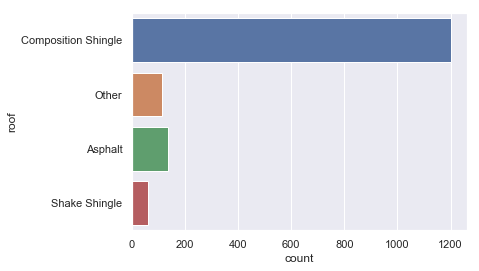

In [96]:
# Bar plot for roof
sns.countplot(y='roof', data=df)
plt.show()

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0;">
    
[**Back to Contents**](#toc)
</div>



<br id="dummy">

# 4. Encode dummy variables

Python machine learning algorithms cannot handle categorical features directly. 

<br>
Create a new dataframe with dummy variables for for our categorical features.

In [97]:
# First 5 rows of dataframe
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,during_recession,property_age,school_score
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood,NaN,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,0,27.0
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,41,9.0
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood,NaN,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,1,49,24.0
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood,NaN,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,5,27.0
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,10,27.0


In [98]:
df.shape

(1864, 30)

In [99]:
df = df.dropna( subset=['exterior_walls'], axis=0)
df = df.reset_index(drop=True)

In [100]:
df = df.dropna( subset=['roof'], axis=0)
df = df.reset_index(drop=True)

In [101]:
# Create new dataframe with dummy features
df = pd.get_dummies(df, columns=['exterior_walls', 'roof', 'property_type'])


Display the first 5 rows of your dataframe to see these new features.

In [102]:
# First 5 rows of dataframe
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,41,9.0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,210000,1,1,680,1963,0,1.0,8,1,0,3,10,1,10,10,60.0,15.0,63.0,147.0,44.0,4.0,3.0,2006,0,0,43,12.0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,218000,1,1,689,1988,0,1.0,150,6,20,27,329,12,83,46,32.0,33.0,92.0,188.0,57.0,10.0,3.0,2009,0,1,21,30.0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,226000,1,1,690,1997,0,1.0,60,3,9,15,156,3,30,12,36.0,47.0,83.0,221.0,67.0,8.0,3.0,2008,0,0,11,24.0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,240000,1,1,703,1992,0,1.0,82,6,7,8,45,6,52,13,30.0,46.0,36.0,139.0,42.0,7.0,3.0,2005,0,0,13,21.0,0,0,0,0,0,0,1,0,1,0,0,1,0


<div style="text-align:center; margin: 40px 0 40px 0;">
    
[**Back to Contents**](#toc)
</div>

<br id="remove">

# 5. Remove unused or redundant features

Finally, let's remove unused for redundant features from our dataset.

<br>
Drop <code style="color:steelblue">'tx_year'</code> and <code style="color:steelblue">'year_built'</code> from your dataset.

In [103]:
target = df['tx_year']

In [104]:
# Drop 'tx_year' and 'year_built' from the dataset
df = df.drop(['tx_year', 'year_built'], axis=1)

Save the analytical base table.

In [105]:
# Save analytical base table
df.to_csv("../project_files/real_estate_analytical.csv", index=None)
target.to_csv("../project_files/real_estate_target.csv", index=None)

C:\Users\iamal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


### Final tip

Not all of the features you engineer need to be winners. 
* In fact, you'll often find that many of them do not add much value to your model. 
* That's OK. 
* One highly predictive feature makes up for 10 duds.

The key is choosing machine learning algorithms that can effectively select the best features among many options (**built-in feature selection**). This will allow you to avoid overfitting your model despite providing many input features. We'll cover this in the next module!


<div style="text-align:center; margin: 40px 0 40px 0;">
    
[**Back to Contents**](#toc)
</div>

<br>

## Next Steps

Congratulations for making through Lesson 3's Feature Engineering module!

As a reminder, here are a few things you did in this module:
* You made several indicator features from domain knowledge.
* You created the interaction feature <code style="color:steelblue">'property_age'</code>.
* You grouped sparse classes in the <code style="color:steelblue">'exterior_walls'</code> and <code style="color:steelblue">'roof'</code> features.
* And you encoded dummy variables and saved the final analytical base table.


<div style="text-align:center; margin: 40px 0 40px 0;">
    
[**Back to Contents**](#toc)
</div>